<a href="https://colab.research.google.com/github/Grace02505/Notebook/blob/main/sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv"
df = pd.read_csv(url)
df
print(df.head)

<bound method NDFrame.head of      edition  start_date          winner_name     winner_team  distance  \
0          1  1903-07-01        Maurice Garin    La Française    2428.0   
1          2  1904-07-02         Henri Cornet           Conte    2428.0   
2          3  1905-07-09    Louis Trousselier  Peugeot–Wolber    2994.0   
3          4  1906-07-04         René Pottier  Peugeot–Wolber    4637.0   
4          5  1907-07-08  Lucien Petit-Breton  Peugeot–Wolber    4488.0   
..       ...         ...                  ...             ...       ...   
101      102  2015-07-04         Chris Froome        Team Sky    3360.3   
102      103  2016-07-02         Chris Froome        Team Sky    3529.0   
103      104  2017-07-01         Chris Froome        Team Sky    3540.0   
104      105  2018-07-07       Geraint Thomas        Team Sky    3349.0   
105      106  2019-07-06          Egan Bernal      Team Ineos    3349.0   

     time_overall  time_margin  stage_wins  stages_led  height  weigh

In [3]:
#checking for null values
df.isnull().sum()

edition           0
start_date        0
winner_name       0
winner_team       0
distance          0
time_overall      8
time_margin       8
stage_wins        0
stages_led        0
height           40
weight           39
age               0
born              0
died             50
full_name        60
nickname         32
birth_town        0
birth_country     0
nationality       0
dtype: int64

In [4]:
df.describe()

,edition,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age
count,106.000000,106.000000,98.000000,98.000000,106.000000,106.000000,66.000000,67.000000,106.000000
mean,53.500000,4212.064151,125.754983,0.267727,2.735849,10.792453,1.778788,69.253731,27.716981
std,30.743563,704.284160,41.559391,0.476194,1.842885,5.307169,0.056989,6.592795,3.354470
min,1.000000,2428.000000,82.086667,0.002222,0.000000,1.000000,1.610000,52.000000,19.000000
25%,27.250000,3657.875000,92.601597,0.050833,1.000000,6.250000,1.740000,64.500000,26.000000
50%,53.500000,4155.500000,115.026806,0.101667,2.000000,12.000000,1.770000,69.000000,28.000000
75%,79.750000,4652.500000,142.678472,0.249931,4.000000,14.000000,1.820000,74.000000,30.000000
max,106.000000,5745.000000,238.740278,2.989167,8.000000,22.000000,1.900000,88.000000,36.000000


In [5]:
#taking out the info from the given data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   edition        106 non-null    int64  
 1   start_date     106 non-null    object 
 2   winner_name    106 non-null    object 
 3   winner_team    106 non-null    object 
 4   distance       106 non-null    float64
 5   time_overall   98 non-null     float64
 6   time_margin    98 non-null     float64
 7   stage_wins     106 non-null    int64  
 8   stages_led     106 non-null    int64  
 9   height         66 non-null     float64
 10  weight         67 non-null     float64
 11  age            106 non-null    int64  
 12  born           106 non-null    object 
 13  died           56 non-null     object 
 14  full_name      46 non-null     object 
 15  nickname       74 non-null     object 
 16  birth_town     106 non-null    object 
 17  birth_country  106 non-null    object 
 18  nationalit

The winning time and how far the runner up is, i.e. how long did it take to win, with every edition. So in a sense checking, are there cyclist getting better bikes, or are they getting lazier

In [6]:
#convert timestrings to pandas timedelta object for easier calculations
df['time_overall'] = pd.to_timedelta(df['time_overall'])
df['time_margin'] = pd.to_timedelta(df['time_margin'])

#winning time
df['winning_time'] = df['time_overall'] + df['time_margin']

#finding the minimum value in the winning column
overall_winning_time = df['winning_time'].min()

print("Overall winning time:", overall_winning_time)




Overall winning time: 0 days 00:00:00.000000082


In [7]:
from pandas.core.internals.construction import range_to_ndarray
def get_sort(df):
    # Step 1: Sort the times in ascending order
    sorted_df = sorted(df)

     # Step 2: Identify the winning time
    winning_time = sorted_df[0]

    # Step 3: Identify the runner-up time
    runner_up_time = sorted_df[1]
    return get_sort

def time_to_seconds(df):
    hours, minutes, seconds = map(int, df.split(":"))
    total_seconds = hours * 3600 + minutes * 60 + seconds
    return total_seconds


def calculate_time_difference(winning_time, runner_up_time):
    winning_time_seconds = time_to_seconds(winning_time)
    runner_up_time_seconds = time_to_seconds(runner_up_time)
    difference_seconds = winning_time_seconds - runner_up_time_seconds
    return difference_seconds



#for i in enumarate(calculate_time_difference, start=1):
    #print(f"Edition {i}: Difference = {diff} seconds")
#print("time difference is:", )




A box plot of the winners per stage type and comment sth

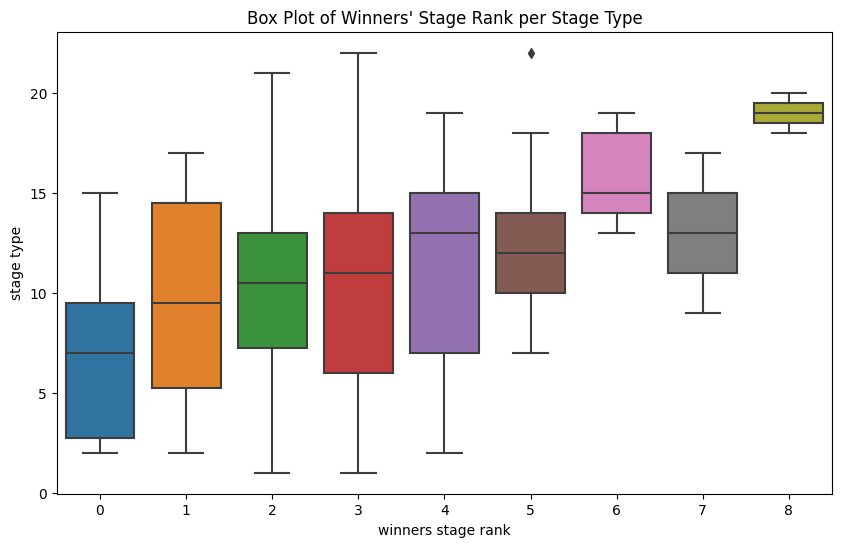

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stage_wins', y='stages_led', data=df)
plt.title("Box Plot of Winners' Stage Rank per Stage Type")
plt.xlabel('winners stage rank')
plt.ylabel("stage type")
plt.show()


The winning time and how far the runner up is, i.e. how long did it take to win, with every edition. So in a sense checking, are there cyclist getting better bikes, or are they getting lazier

In [9]:
# Sort the DataFrame by start_date in ascending order
df.sort_values(by='start_date', inplace=True)

# Create new columns for the winning time and time difference with the runner-up
df['winning_time'] = df['time_overall'].min()
df['time_difference_runner_up'] = df['time_overall'].min() - df['time_overall']

# Display the resulting DataFrame with the winning time and time difference for each edition
print(df[['edition', 'start_date', 'winner_name', 'winning_time', 'time_difference_runner_up']])


     edition  start_date          winner_name              winning_time  \
0          1  1903-07-01        Maurice Garin 0 days 00:00:00.000000082   
1          2  1904-07-02         Henri Cornet 0 days 00:00:00.000000082   
2          3  1905-07-09    Louis Trousselier 0 days 00:00:00.000000082   
3          4  1906-07-04         René Pottier 0 days 00:00:00.000000082   
4          5  1907-07-08  Lucien Petit-Breton 0 days 00:00:00.000000082   
..       ...         ...                  ...                       ...   
101      102  2015-07-04         Chris Froome 0 days 00:00:00.000000082   
102      103  2016-07-02         Chris Froome 0 days 00:00:00.000000082   
103      104  2017-07-01         Chris Froome 0 days 00:00:00.000000082   
104      105  2018-07-07       Geraint Thomas 0 days 00:00:00.000000082   
105      106  2019-07-06          Egan Bernal 0 days 00:00:00.000000082   

      time_difference_runner_up  
0   -1 days +23:59:59.999999988  
1   -1 days +23:59:59.999999986

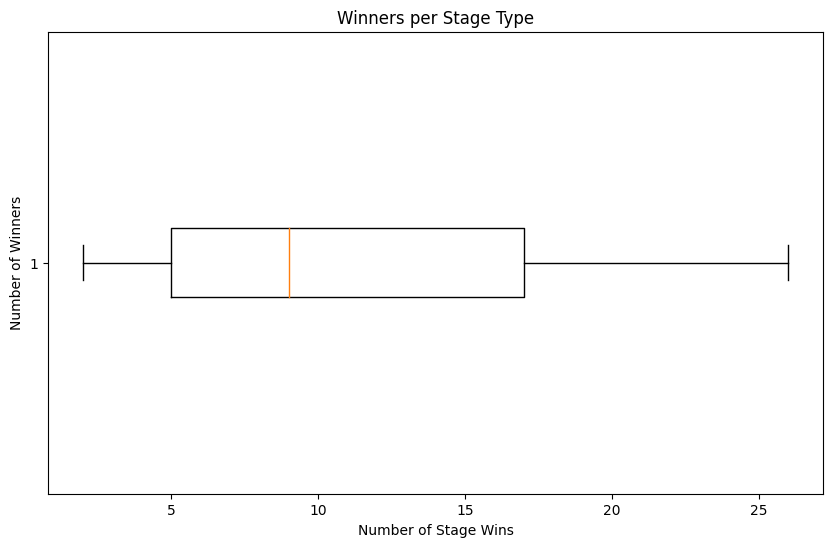

In [10]:
# nope
plt.figure(figsize=(10, 6))
plt.boxplot(df.groupby('stage_wins')['winner_name'].count().values, vert=False)
plt.xlabel('Number of Stage Wins')
plt.ylabel('Number of Winners')
plt.title('Winners per Stage Type')
plt.show()

What relationship is there between a winners age and the number of stages led.

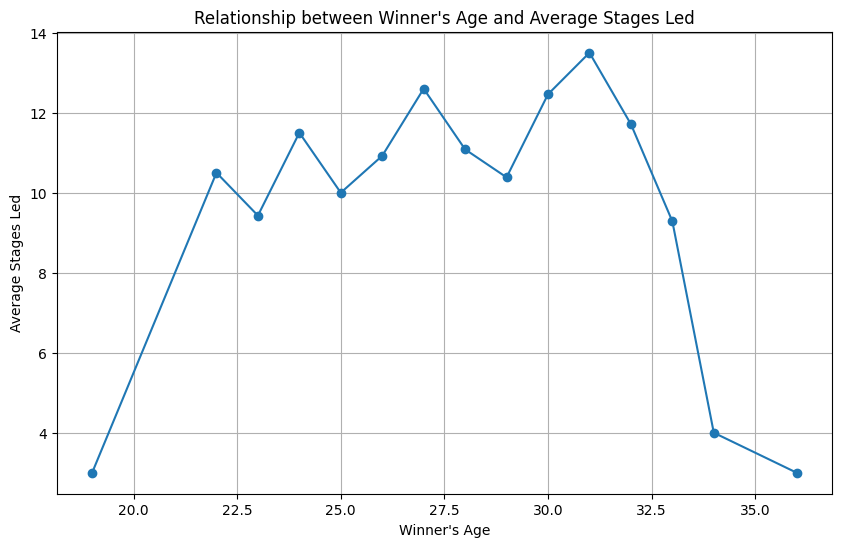

In [11]:
# Group the data by the winner's age and calculate the average number of stages led
age_stages_led = df.groupby('age')['stages_led'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(age_stages_led['age'], age_stages_led['stages_led'], marker='o')
plt.xlabel('Winner\'s Age')
plt.ylabel('Average Stages Led')
plt.title('Relationship between Winner\'s Age and Average Stages Led')
plt.grid(True)
plt.show()

Sort by the most recent winning and find the winner's nationality and display the top.

In [12]:
# Convert the 'start_date' column to datetime
df['start_date'] = pd.to_datetime(df['start_date'])

# Sort the DataFrame by the 'start_date' column in descending order (most recent first)
df_sorted = df.sort_values(by='start_date', ascending=False)

# Get the nationality of the most recent winner
most_recent_winner_nationality = df_sorted.iloc[0]['nationality']

# Display the nationality of the most recent winner and the top of the sorted DataFrame
print("Most Recent Winner's Nationality:", most_recent_winner_nationality)
print("\nTop of the Sorted DataFrame:")
print(df_sorted.head())


Most Recent Winner's Nationality:  Colombia

Top of the Sorted DataFrame:
     edition start_date     winner_name winner_team  distance  \
105      106 2019-07-06     Egan Bernal  Team Ineos    3349.0   
104      105 2018-07-07  Geraint Thomas    Team Sky    3349.0   
103      104 2017-07-01    Chris Froome    Team Sky    3540.0   
102      103 2016-07-02    Chris Froome    Team Sky    3529.0   
101      102 2015-07-04    Chris Froome    Team Sky    3360.3   

                 time_overall time_margin  stage_wins  stages_led  height  \
105 0 days 00:00:00.000000082      0 days           0           2    1.75   
104 0 days 00:00:00.000000083      0 days           2          11    1.83   
103 0 days 00:00:00.000000086      0 days           0          15    1.86   
102 0 days 00:00:00.000000089      0 days           2          14    1.86   
101 0 days 00:00:00.000000084      0 days           1          16    1.86   

     ...  age        born died                 full_name nickname birth_

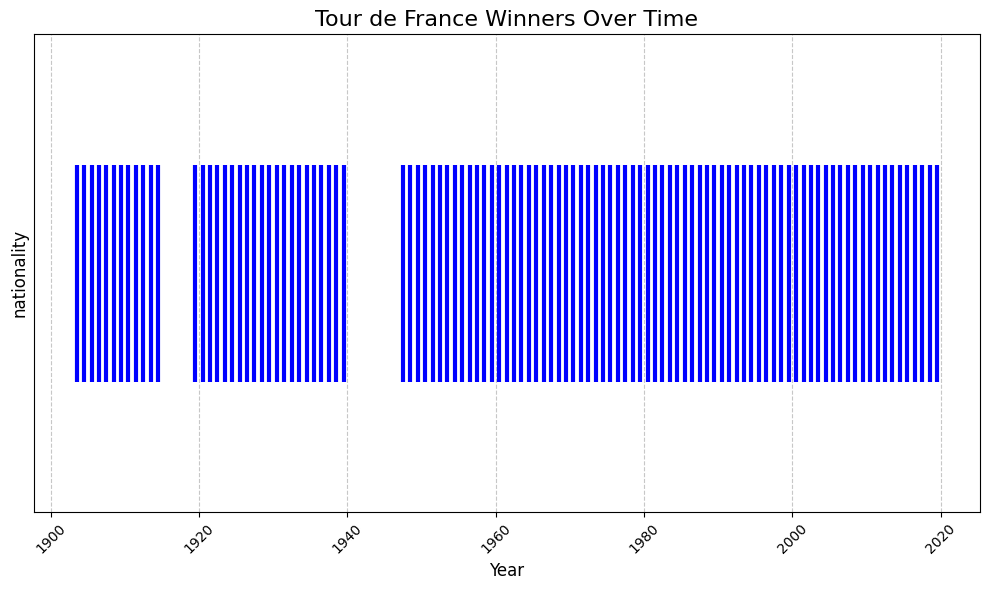

In [13]:
# Plotting the event plot graph
plt.figure(figsize=(10, 6))
plt.eventplot(df_sorted['start_date'], color='blue', linewidths=3, lineoffsets=0.5)
plt.title('Tour de France Winners Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('nationality', fontsize=12)
plt.yticks([], [])
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()